In [1]:
import pandas as pd
import numpy as np
import src.dataframes as df
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = pd.read_csv("outputs/combined.csv")

In [3]:
cargo = df.cargofilter(file).drop("Traffic_type", axis=1)

# para entender el impacto del coronavirus en el mercado aeronautico hay que analizar la tendecia de años anteriores tanto para carga como para pasajeros del mercado aeronautico europeo

In [4]:
countries = ["Austria","Germany","Spain","Italy","France"]
data = df.yearsfilter(df.personfilter(file,countries),2008,qrt=2).drop("Traffic_type",axis=1).set_index("Country")



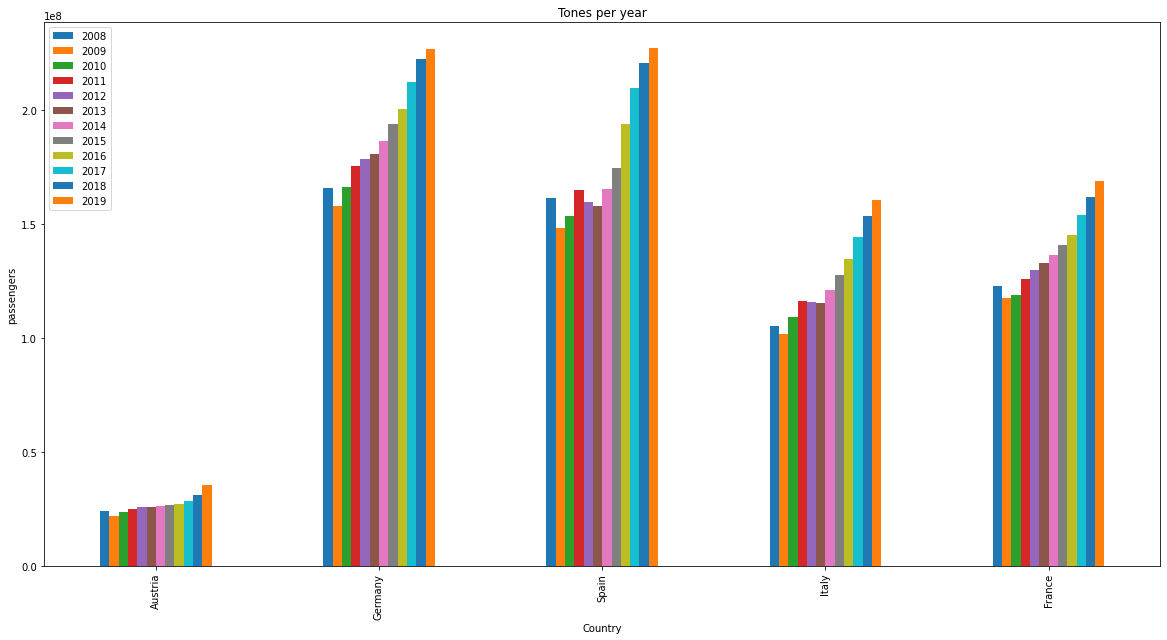

In [5]:
data.plot.bar(figsize= (20,10))
plt.title("Tones per year")
plt.xlabel("Country")
plt.ylabel("passengers")
plt.show()

In [6]:
data2 = df.yearsfilter(df.cargofilter(file,countries),2008,qrt=2).drop("Traffic_type",axis=1).set_index("Country")
data2

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country,,,,,,,,,,,,
Austria,206221,202642,236633,219448,197543,196459,217785,216621,223421,227643,237701,228223
Germany,3568563,3341222,4099072,4309649,4218208,4231474,4336163,4325665,4467022,4773359,4842716,4684553
Spain,539803,502585,592336,611974,593523,580847,593902,594393,639237,742443,806518,815612
Italy,814995,705883,838724,846551,790493,826981,876495,916755,991688,1077874,1066221,1023952
France,1672284,1450562,1525970,1765733,1753085,1741021,2361510,2380931,2401593,2450326,2407878,2313684


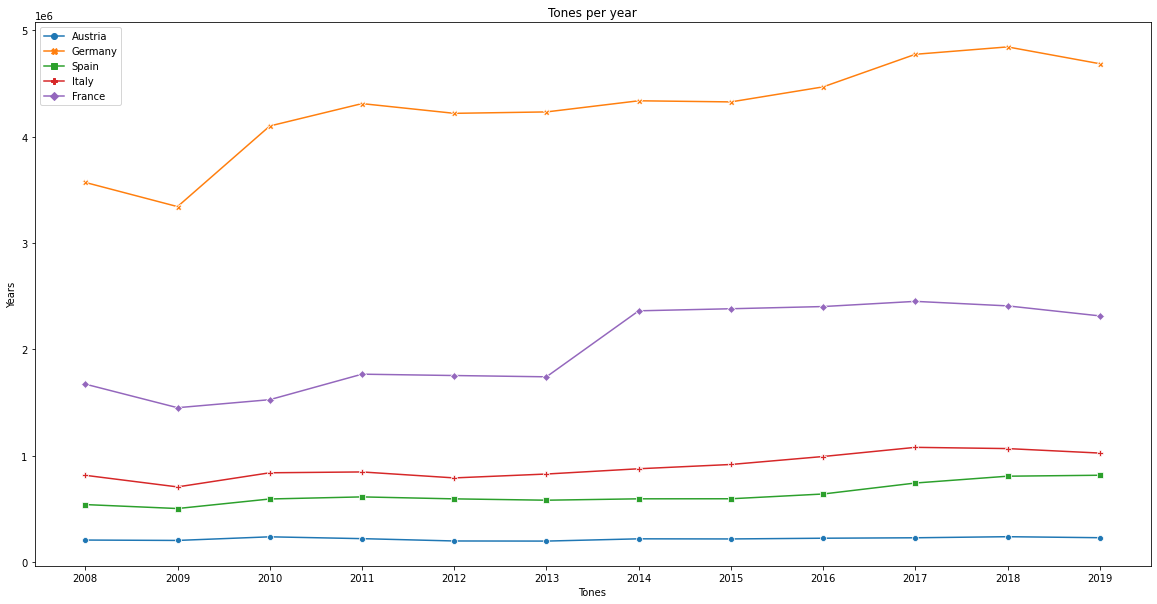

In [7]:
plt.figure(figsize= (20,10))
ax = sns.lineplot(data=data2.T,markers=True, dashes=False)
ax.set(xlabel='Tones', ylabel='Years')
plt.title("Tones per year")
        
plt.show()

## como se puede observar, hasta el 2019 la tendencia era de gran crecimiento para la mayor parte de los paises, ahora comparando los 2 primero cuartos del año de todos los años, observaremos una caida muy grande. 

In [8]:
data3 = df.quartersum(df.yearsfilter(df.personfilter(file,countries),2008, qrt = 3))

/home/borja/.local/lib/python3.8/site-packages/pandas/core/indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
/home/borja/Desktop/Ironhack/soy-analista-de-datos/src/dataframes.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file[x]= a+b
/home/borja/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [9]:
data3

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country,,,,,,,,,,,,,
Austria,11971709.0,10417750.0,10975984.0,11844514.0,12538962.0,12324298.0,12697688.0,12635460.0,12625598.0,13491674.0,14097453.0,16837823.0,6103403.0
Germany,79462969.0,73290423.0,74856101.0,81321495.0,83388779.0,83702750.0,85597557.0,89521933.0,92106063.0,98514033.0,101800849.0,106374714.0,36220920.0
Spain,77494851.0,67913405.0,68676365.0,75556587.0,73331618.0,70718208.0,74292419.0,77974143.0,86750260.0,95102097.0,100766342.0,105318324.0,33739051.0
Italy,50850241.0,46768196.0,49079114.0,53645288.0,53922494.0,53015046.0,55092944.0,58298423.0,61158474.0,65981717.0,70200670.0,74286680.0,21924825.0
France,59913261.0,56232288.0,55321737.0,59693527.0,61670239.0,62727420.0,65097702.0,66456709.0,68290917.0,72384677.0,75947727.0,80362523.0,28191375.0


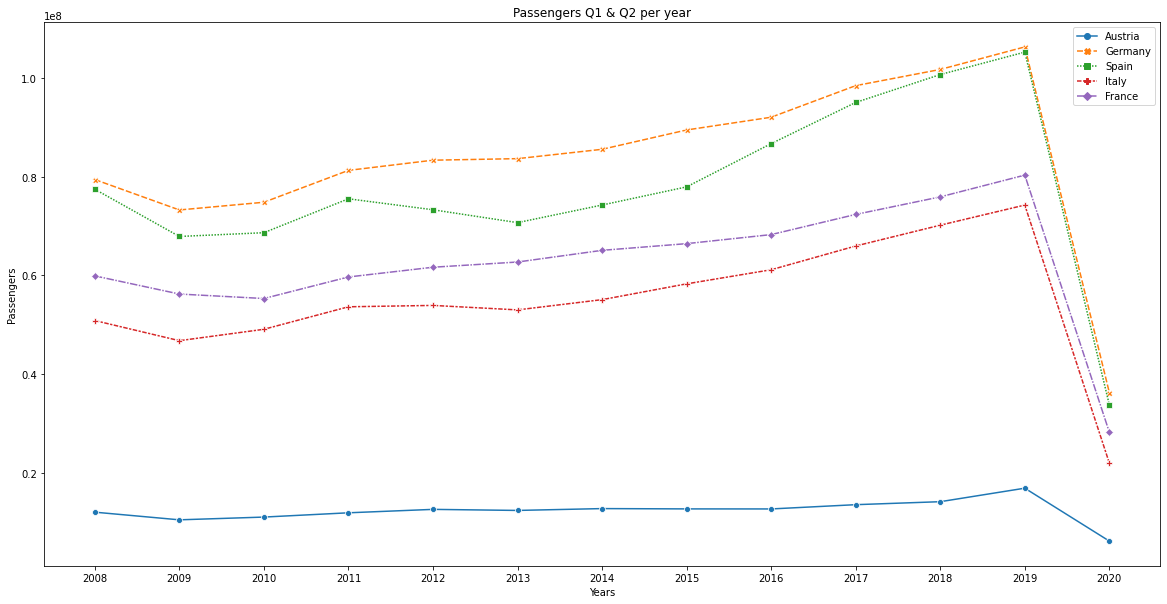

In [10]:
plt.figure(figsize= (20,10))
ax = sns.lineplot(data=data3.T,markers=True, dashes=True)
ax.set(xlabel='Years', ylabel='Passengers')
plt.title("Passengers Q1 & Q2 per year")
        
plt.show()

## como se puede observar la bajada de clientes en el primer cuarto del año ha sido muy elevada para todos los paises de la uion europea, por lo que podemos podriamos decir que la recuperacion de dicho sector sera lenta debido a la naturaleza de los hechos que nos han llevado aqui

In [11]:
data4 = data3.pct_change(axis='columns').apply(lambda x: x*100)
data4

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country,,,,,,,,,,,,,
Austria,NaN,-12.980260,5.358489,7.913004,5.863035,-1.711976,3.029706,-0.490073,-0.078050,6.859683,4.490021,19.438760,-63.751828
Germany,NaN,-7.767827,2.136265,8.637097,2.542113,0.376515,2.263733,4.584682,2.886589,6.957164,3.336394,4.492954,-65.949690
Spain,NaN,-12.363978,1.123431,10.018326,-2.944772,-3.563824,5.054159,4.955720,11.255163,9.627449,5.955962,4.517364,-67.964691
Italy,NaN,-8.027582,4.941217,9.303701,0.516739,-1.682875,3.919450,5.818311,4.905881,7.886467,6.394124,5.820472,-70.486196
France,NaN,-6.143837,-1.619267,7.902481,3.311434,1.714248,3.778702,2.087642,2.760004,5.994589,4.922382,5.812940,-64.919749


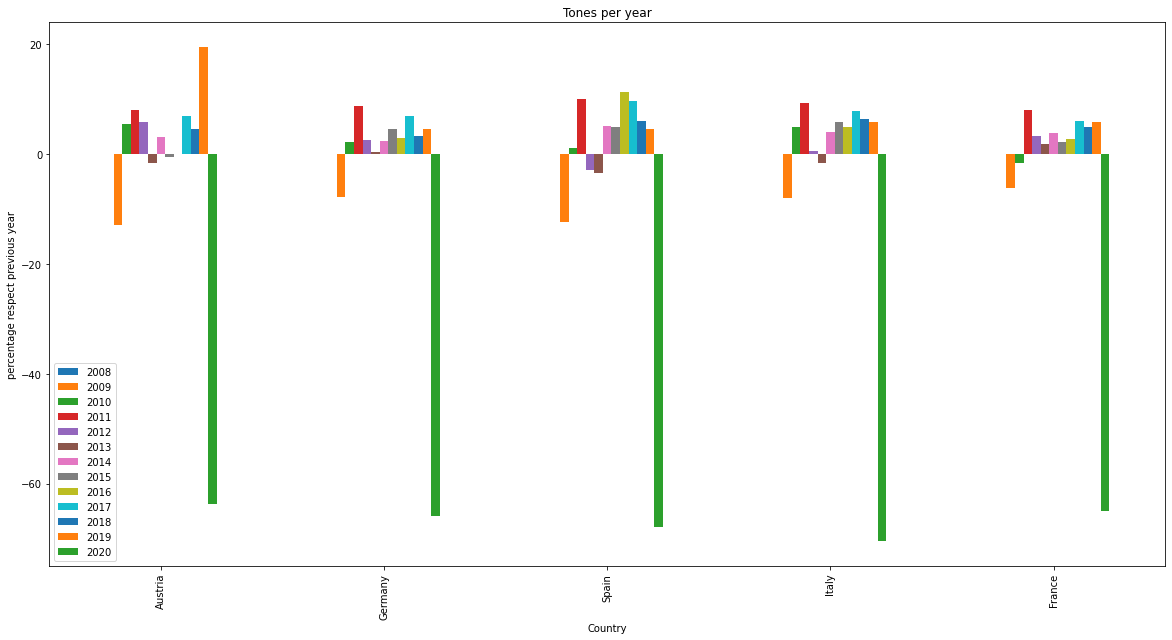

In [12]:
data4.plot.bar(figsize= (20,10))
plt.title("passengers gain lost per year")
plt.xlabel("Country")
plt.ylabel("percentage respect previous year")
plt.show()

## en esta ultima se puede apreciar como la comparacion con los anteriores años, en el mismo periodo de tiempo porcentualmente la bajada ha sido muy grande